In [110]:
import pandas as pd
import numpy as np
import explore_leafly_data as eld
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
df = eld.load_data()

explore_leafly_data.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['product'][df['product'] == p] = product_renames[p]


In [112]:
df.head()

,date,product,rating,review,user,time
0,2016-08-07,sunset-haze,4.0,Love it! Vaped some of this before a dance cla...,CorruptedCupcakez,18:53:38
1,2016-08-04,sunset-haze,4.0,"Tastes like pooh, but the high is nice and ene...",c1n1m1n,04:33:40
2,2015-12-30,sunset-haze,5.0,very intense body high. everything was numb an...,420cakeit,01:06:32
3,2015-12-23,sunset-haze,3.0,I felt like the citrus flavors were overpowere...,Smalls2014,20:52:15
4,2015-12-18,sunset-haze,3.0,This strain made me more analytic and I was ab...,sherrdawgg,18:26:44


In [113]:
date_df = df.groupby('date').count()

In [114]:
date_df_ts = date_df.reset_index()

In [115]:
date_df_ts['rolling_mean_reviews_p=10'] = pd.rolling_mean(date_df_ts.review, window=10)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  if __name__ == '__main__':


In [116]:
date_df_ts.head()

,date,product,rating,review,user,time,rolling_mean_reviews_p=10
0,2010-06-12,4,4,4,4,4,NaN
1,2010-06-14,2,2,2,2,2,NaN
2,2010-06-16,2,2,2,2,2,NaN
3,2010-06-19,2,2,2,2,2,NaN
4,2010-07-03,2,2,2,2,2,NaN


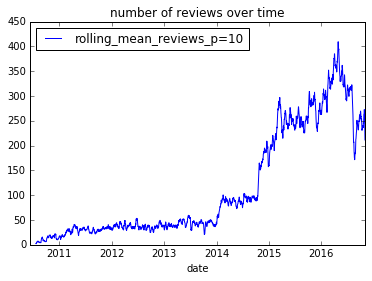

In [117]:
f = date_df_ts.plot(x='date', y='rolling_mean_reviews_p=10')
t = plt.title('number of reviews over time')

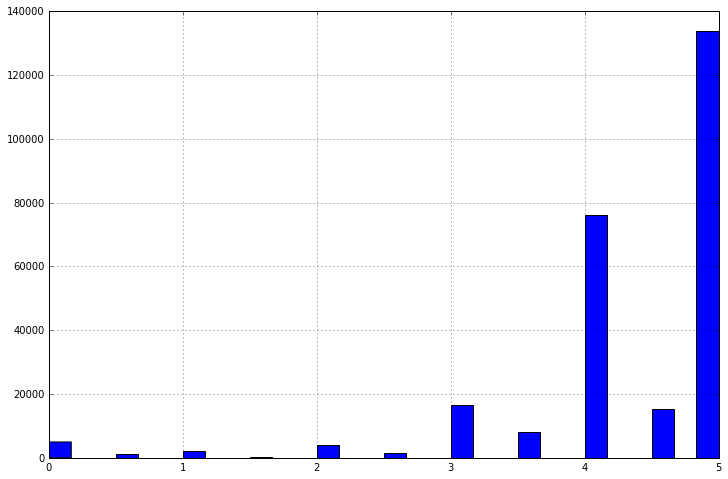

In [118]:
f = plt.figure(figsize=(12, 8))
ax = plt.gca()
f = df.rating.hist(ax=ax, bins=30)

In [119]:
df.rating.mean()

4.3008760823085206

In [120]:
print df.user.unique().shape[0], 'unique users'

65774 unique users


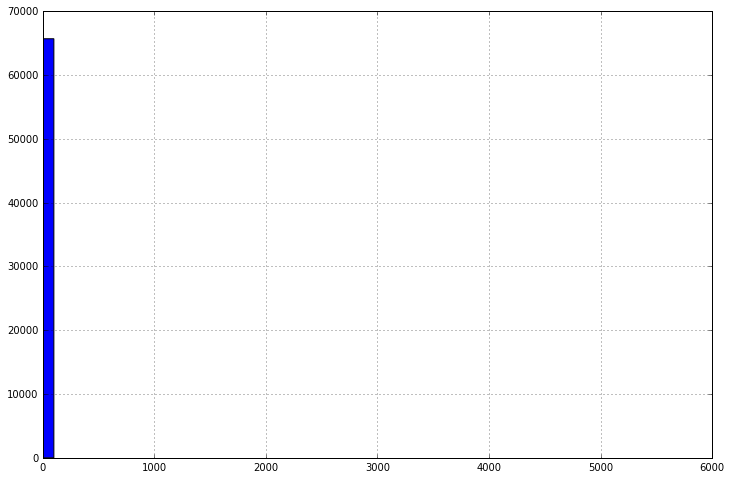

In [121]:
users = df.groupby('user').count()

f = plt.figure(figsize=(12, 8))
ax = plt.gca()
f = users.rating.hist(ax=ax, bins=50)

In [122]:
print 'max number of ratings by a user:', users.rating.max()
print 'for user', users.rating.argmax()

max number of ratings by a user: 5012
for user Anonymous


# uhhh...need to remove 'anonymous' reviews. Riiiight

In [123]:
df_no_anon = df[df['user'] != 'Anonymous']

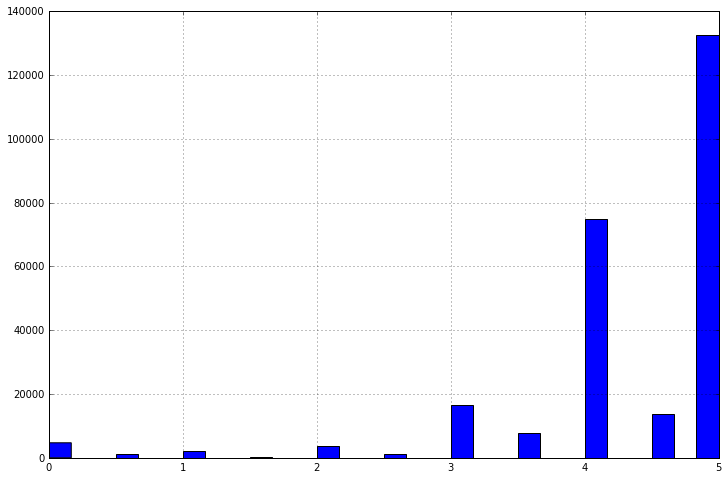

In [124]:
f =plt.figure(figsize=(12, 8))
ax = plt.gca()
f = df_no_anon.rating.hist(ax=ax, bins=30)

In [125]:
df.rating.mean()

4.3008760823085206

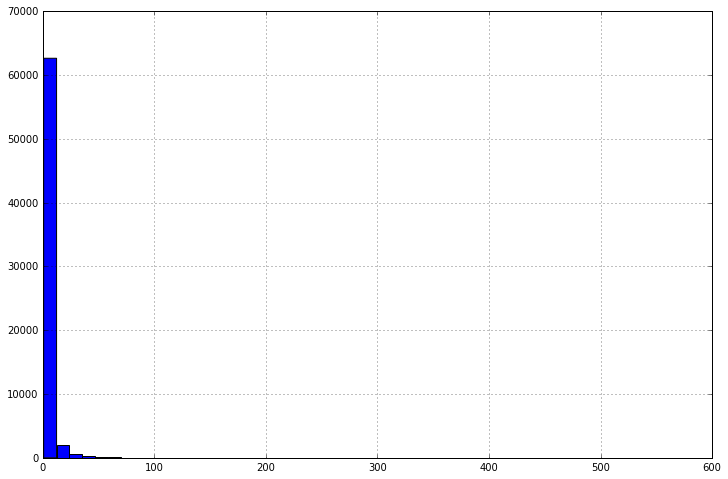

In [126]:
users = df_no_anon.groupby('user').count()

f = plt.figure(figsize=(12, 8))
ax = plt.gca()
f = users.rating.hist(ax=ax, bins=50)

In [127]:
print 'max number of ratings by a user:', users.rating.max()
print 'for user', users.rating.argmax()

max number of ratings by a user: 578
for user Chill_Panda


In [133]:
users.sort_values(by='rating', ascending=False)

,date,product,rating,review,time
user,,,,,
Chill_Panda,578,578,578,578,578
sweetbutter80,445,445,445,445,445
KindGodess420,350,350,350,350,350
emanuel80,336,336,336,336,336
gatorhunts420,308,308,308,308,308
hi2,265,265,265,265,265
eb,256,256,256,256,256
demis,253,253,253,253,253
jjjallen,247,247,247,247,247


In [134]:
most_ratings = users[users['rating'] > 10]

In [135]:
most_ratings.shape

(3960, 5)

In [13]:
# users with fewer than 20 ratings
fewer_ratings = users[users['rating'] < 20]

In [14]:
fewer_ratings.shape[0]

64192

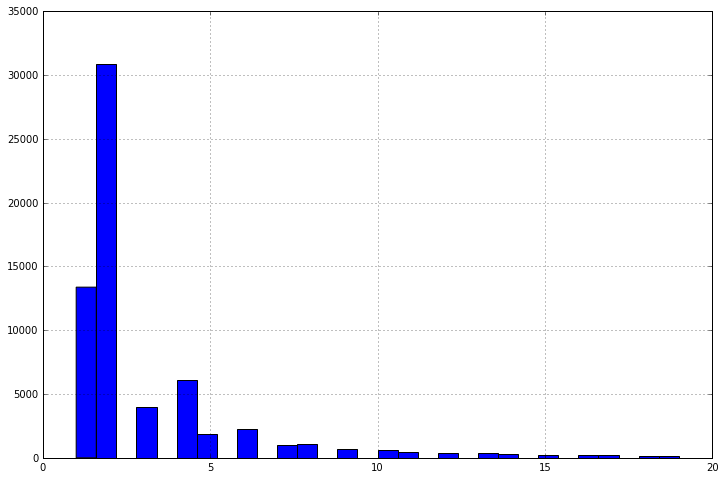

In [15]:
f = plt.figure(figsize=(12, 8))
ax = plt.gca()
f = fewer_ratings.rating.hist(ax=ax, bins=30)

In [16]:
fewer_ratings.rating.mean()

3.0480589481555334

In [17]:
fewer_ratings.rating.mode()[0]

2

In [18]:
df[df['user'] == 'Anonymous'].shape[0]

5012

In [19]:
df.shape[0]

263788

In [27]:
# users with more than 2 ratings
more_ratings = users[(users['rating'] > 2) & (users['rating'] < 30)]

In [28]:
more_ratings.shape[0]

20738

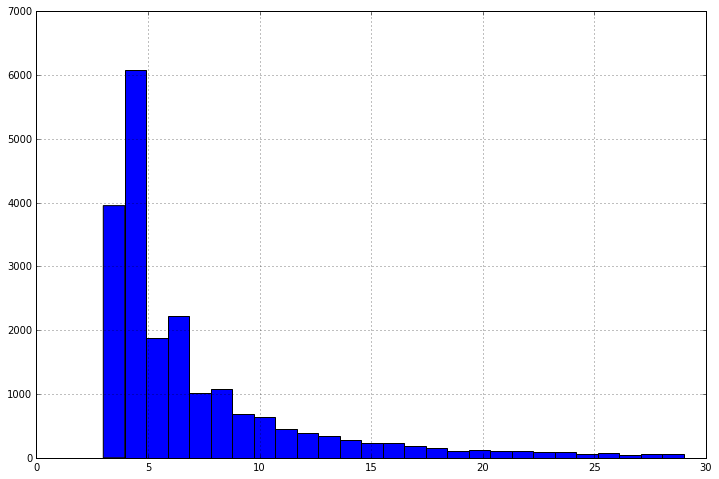

In [32]:
f = plt.figure(figsize=(12, 8))
ax = plt.gca()
f = more_ratings.rating.hist(ax=ax, bins=27)

In [34]:
df.columns

Index([u'date', u'rating', u'review', u'user'], dtype='object')

In [38]:
products = df.groupby('product')

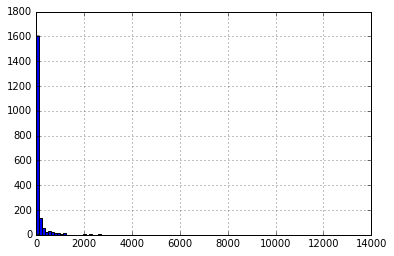

In [40]:
f = products.count()['rating'].hist(bins=100)

In [41]:
products.count()['rating'].mean()

135.83316168898043

In [42]:
products.count()['rating'].argmax()

u'blue-dream'

In [43]:
prod_rev_cnt = products.count()

In [44]:
fewer_reviews = prod_rev_cnt[prod_rev_cnt.rating < 1000]

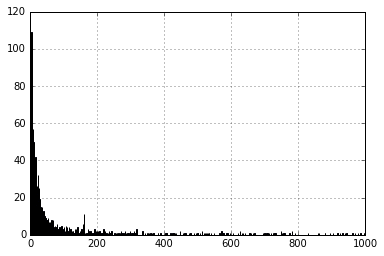

In [48]:
f = fewer_reviews.rating.hist(bins=1000)

In [49]:
df.shape[0]

263788

In [53]:
more_reviews = prod_rev_cnt[(prod_rev_cnt.rating > 3)]

In [54]:
more_reviews.shape

(1646, 5)

In [55]:
prod_rev_cnt.shape

(1942, 5)

# luckily just found out some of the strain names are messed up...encoded or something

In [109]:
df2 = eld.load_data(fix_names=False)
prod_rev_cnt = df2.groupby('product').count()

TypeError: load_data() takes no arguments (1 given)

In [59]:
products = prod_rev_cnt.index

In [68]:
prod_by_len = sorted(products, key=lambda x: len(x), reverse=True)

In [71]:
prod_by_len

[u'edi-pure-savory-roasted-garlic-crackers',
 u'edi-pure-savory-roasted-tomato-crackers',
 u'liquid-gold-vape-pen-super-silver-haze',
 u'golden-xtrx-oil-vaporizer-cartridge-h',
 u'golden-xtrx-oil-vaporizer-cartridge-i',
 u'golden-xtrx-oil-vaporizer-cartridge-s',
 u'golden-xtrx-personal-vaporizer-hybrid',
 u'golden-xtrx-personal-vaporizer-sativa',
 u'0bf3f759-186e-4dad-89d0-e0fc7598ac53',
 u'29aca226-23ba-4726-a4ab-f3bf68f2a3c4',
 u'c42aa00a-595a-4e58-a7af-0f8ab998073a',
 u'liquid-gold-vape-pen-blackberry-kush',
 u'dixie-medicated-chocolate-truffles',
 u'dixie-medicated-crispy-rice-treats',
 u'liquid-gold-vape-pen-pink-lemonade',
 u'dixie-elixirs-sparkling-blueberry',
 u'liquid-gold-vape-pen-green-crack',
 u'liquid-gold-vape-pen-orange-kush',
 u'liquid-gold-vape-pen-purple-haze',
 u'liquid-gold-vape-pen-silver-haze',
 u'liquid-gold-vape-pen-white-widow',
 u'edipure-wild-strawberry-gummies',
 u'liquid-gold-vape-pen-red-diesel',
 u'dixie-medicated-fruit-lozenges',
 u'middlefork-x-pineappl

In [74]:
import scrape_leafly as sl

In [75]:
strains = sl.load_current_strains()

In [79]:
strain_names = np.array([s.split('/')[-1] for s in strains])

In [80]:
mask = strain_names == '0bf3f759-186e-4dad-89d0-e0fc7598ac53'

In [82]:
strains = np.array(strains)

In [83]:
strains[mask] # turns out it's berry white

array(['/Indica/0bf3f759-186e-4dad-89d0-e0fc7598ac53'], 
      dtype='|S48')

In [84]:
mask = strain_names == '29aca226-23ba-4726-a4ab-f3bf68f2a3c4'

In [85]:
strains[mask] # turns out it's dynamite

array(['/Indica/29aca226-23ba-4726-a4ab-f3bf68f2a3c4'], 
      dtype='|S48')

In [86]:
mask = strain_names == 'c42aa00a-595a-4e58-a7af-0f8ab998073a'

In [87]:
strains[mask] # it's kaboom

array(['/Sativa/c42aa00a-595a-4e58-a7af-0f8ab998073a'], 
      dtype='|S48')